In [1]:
import pandas as pd
from causalfair import *

### Using *causalfair* on the OULAD dataset
This Jupyter-Notebook serves to show how *causalfair* can be employed on a real dataset. To do this, we selected the OULAD-dataset (https://analyse.kmi.open.ac.uk/open_dataset), a well known educational dataset of Massive Open Online Courses (MOOCs), that can be used to predict who passes the final exam. 

We prepared the dataset in oulad_preprocessingI.py and oulad_preprocessingII.py. You can directly load the prepared data which is stored in oulad_preprocessed.csv.

We select only the performance features and the demographic features as well as the target for now. The classification of the features in these categories follows Cohausz et al. (https://files.eric.ed.gov/fulltext/ED630856.pdf).

The reason for the limitation is that the graphs are hard to read with too many variables, and we only want to showcase how *causalfair* works on real data.


In [2]:
data = pd.read_csv("oulad_preprocessed.csv",index_col=0)
y_col = "final_result"
demographic_cols = ["gender", "region", "highest_education", "imd_band", "age_band", "disability"]
perf_cols = ["num_of_prev_attempts","studied_credits", "avg_tma", "avg_cma"] 
data.head()

,gender,region,highest_education,imd_band,age_band,disability,num_of_prev_attempts,studied_credits,avg_tma,avg_cma,final_result
0,0,1,3,9,2,0,0,240,82.0,79.902875,1
1,1,2,3,2,1,0,0,60,66.4,79.902875,1
2,1,3,2,5,1,0,0,60,76.0,79.902875,1
3,1,4,1,5,0,0,0,60,54.4,79.902875,1
4,0,5,2,8,1,0,0,60,68.0,79.902875,1


#### Investigating Gender
First, we will only select gender and disregard all other sensitive features.

In [3]:
var_inspect = ["gender"]
data_inspect = data[perf_cols+[y_col]+var_inspect]

Next, we try to learn the DAG from the data. We first experiment using HC, then we will use LiNGAM.
As our data in mostly continuous, we select this. We also specify the tiers. 

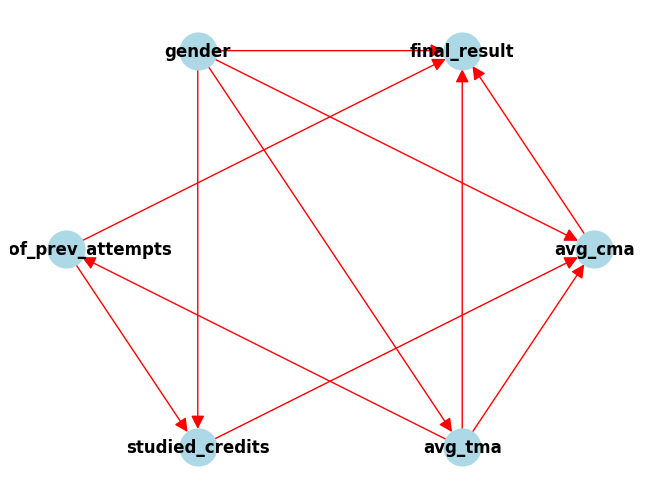

The following variables are likely problematic: ['gender'].
They are part of the following paths: [['gender', 'studied_credits', 'avg_cma', 'final_result'], ['gender', 'avg_tma', 'num_of_prev_attempts', 'studied_credits', 'avg_cma', 'final_result'], ['gender', 'avg_tma', 'avg_cma', 'final_result'], ['gender', 'avg_tma', 'final_result'], ['gender', 'avg_cma', 'final_result']].
The following variables are potentially dangerous to remove: ['gender'].
They are part of the following paths: [['gender', 'avg_tma', 'num_of_prev_attempts', 'final_result']].
The following variables are blocked and unproblematic: [].
The following variables are not connected and unproblematic: [].


In [4]:
adjacency_matrix, nodes = learn_DAG(data_inspect, method="HC",dominant_data_type="continuous",tiers=[[y_col],perf_cols,var_inspect])
dag_structure_info = identify_structures(adjacency_matrix, nodes,sensitive_variables=var_inspect,target_variable=y_col, draw_problematic=True)

We can observe that a relatively densely connected network has been learned. The red arrows signal that all relationships are generally problematic because each variable is influenced (directly or indirectly) by gender. We can also see, however, that there is one relationship that might indicate that we should not remove gender. However, in general, we can see that gender is problematic and all variables need to be adjusted if we believe that the relationship is unjustified.

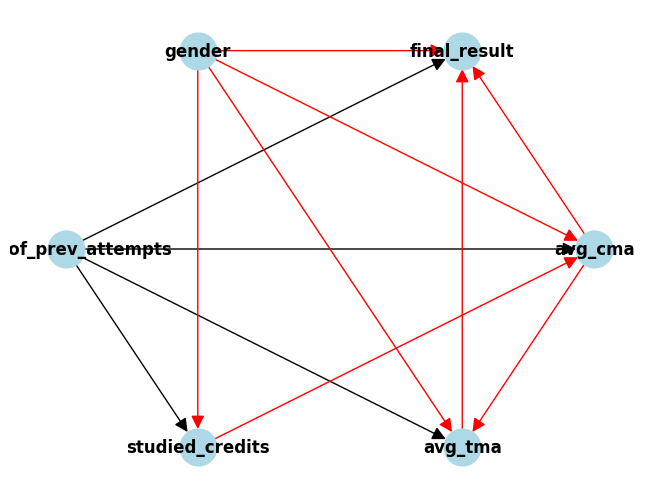

The following variables are likely problematic: ['gender'].
They are part of the following paths: [['gender', 'studied_credits', 'avg_cma', 'avg_tma', 'final_result'], ['gender', 'studied_credits', 'avg_cma', 'final_result'], ['gender', 'avg_tma', 'final_result'], ['gender', 'avg_cma', 'avg_tma', 'final_result'], ['gender', 'avg_cma', 'final_result']].
The following variables are potentially dangerous to remove: [].
They are part of the following paths: [].
The following variables are blocked and unproblematic: [].
The following variables are not connected and unproblematic: [].


In [5]:
adjacency_matrix, nodes = learn_DAG(data_inspect, method="LiNGAM",dominant_data_type="continuous",tiers=[[y_col],perf_cols,var_inspect])
dag_structure_info = identify_structures(adjacency_matrix, nodes,sensitive_variables=var_inspect,target_variable=y_col, draw_problematic=True)

Using LiNGAM, a slightly different DAG is learnt with some connections that are not problematic. 

#### Investigating Disability
Alternatively, we can inspect disability.

In [6]:
var_inspect = ["disability"]
data_inspect = data[perf_cols + [y_col] + var_inspect]

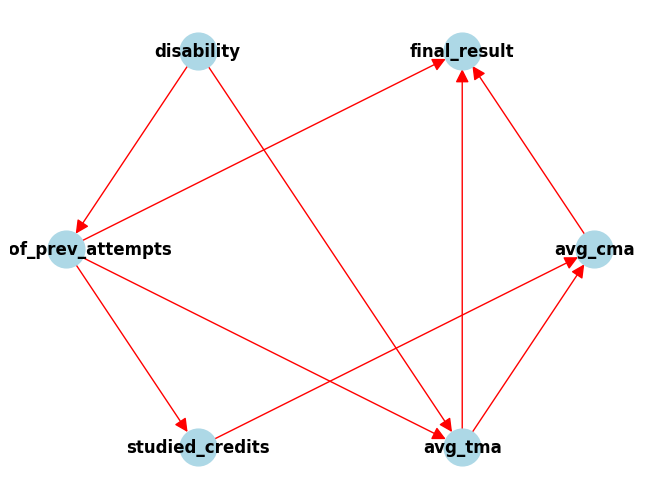

The following variables are likely problematic: ['disability'].
They are part of the following paths: [['disability', 'num_of_prev_attempts', 'studied_credits', 'avg_cma', 'final_result'], ['disability', 'num_of_prev_attempts', 'avg_tma', 'avg_cma', 'final_result'], ['disability', 'num_of_prev_attempts', 'avg_tma', 'final_result'], ['disability', 'num_of_prev_attempts', 'final_result'], ['disability', 'avg_tma', 'avg_cma', 'final_result'], ['disability', 'avg_tma', 'final_result']].
The following variables are potentially dangerous to remove: [].
They are part of the following paths: [].
The following variables are blocked and unproblematic: [].
The following variables are not connected and unproblematic: [].


In [7]:
adjacency_matrix1, nodes1 = learn_DAG(data_inspect, method="HC",dominant_data_type="continuous",tiers=[[y_col],perf_cols,var_inspect])
dag_structure_info = identify_structures(adjacency_matrix1, nodes1,sensitive_variables=var_inspect,target_variable=y_col, draw_problematic=True)

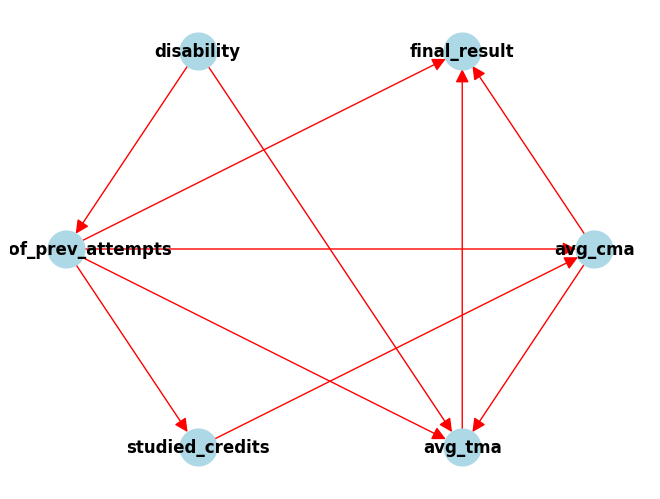

The following variables are likely problematic: ['disability'].
They are part of the following paths: [['disability', 'num_of_prev_attempts', 'studied_credits', 'avg_cma', 'avg_tma', 'final_result'], ['disability', 'num_of_prev_attempts', 'studied_credits', 'avg_cma', 'final_result'], ['disability', 'num_of_prev_attempts', 'avg_tma', 'final_result'], ['disability', 'num_of_prev_attempts', 'avg_cma', 'avg_tma', 'final_result'], ['disability', 'num_of_prev_attempts', 'avg_cma', 'final_result'], ['disability', 'num_of_prev_attempts', 'final_result'], ['disability', 'avg_tma', 'final_result']].
The following variables are potentially dangerous to remove: [].
They are part of the following paths: [].
The following variables are blocked and unproblematic: [].
The following variables are not connected and unproblematic: [].


In [8]:
adjacency_matrix2, nodes2 = learn_DAG(data_inspect, method="LiNGAM",dominant_data_type="continuous",tiers=[[y_col],perf_cols,var_inspect])
dag_structure_info = identify_structures(adjacency_matrix2, nodes2,sensitive_variables=var_inspect,target_variable=y_col, draw_problematic=True)

The two learned networks are nearly identical and both indicate that all relationships are affected.

This shows how tricky real data is but also that the method is valuable.

If we want to really compare two DAGs produced by *causalfair*, we can execute the below code.

In [9]:
comp = compare_dags((adjacency_matrix1, nodes1),(adjacency_matrix2, nodes2))

Matching Edges: 8
Edges DAG2 has DAG1 has not: 2
Edges DAG1 has DAS2 has not: 1


To see what edges match, we can specify comp[0], for edges present in DAG2 but not DAG1, we can specify comp[1], and comp[2] for the opposite.

In [10]:
comp[0]

{('avg_cma', 'final_result'),
 ('avg_tma', 'final_result'),
 ('disability', 'avg_tma'),
 ('disability', 'num_of_prev_attempts'),
 ('num_of_prev_attempts', 'avg_tma'),
 ('num_of_prev_attempts', 'final_result'),
 ('num_of_prev_attempts', 'studied_credits'),
 ('studied_credits', 'avg_cma')}